In [1]:
#Pacotes
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm

from sklearn.metrics import precision_score,\
    recall_score, classification_report,\
    accuracy_score, f1_score

In [2]:
#Dados
df=pd.read_csv('p1_data_train.csv',sep=',')
df.head(5)

,Temp1,Temp2,Temp3,Temp4,target
0,37.861329,19.500455,36.650759,29.950579,0
1,43.368864,33.651709,35.363611,34.857155,1
2,29.558386,38.748206,36.079785,35.487638,1
3,29.352183,32.841901,32.317949,39.671056,1
4,30.894656,40.579436,21.596942,35.523174,1


In [3]:
#Feature importances with forests of trees

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

X=df[df.columns.difference(['target'])]
y=df.target

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
df[df.columns[indices[0:2]]].head(5)

Feature ranking:
1. feature 3 (0.554902)
2. feature 1 (0.287683)
3. feature 0 (0.079223)
4. feature 2 (0.078192)


<Figure size 640x480 with 1 Axes>

,Temp4,Temp2
0,29.950579,19.500455
1,34.857155,33.651709
2,35.487638,38.748206
3,39.671056,32.841901
4,35.523174,40.579436


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

X=df[df.columns.difference(['target'])]
y=df.target

# We use the base estimator RandomForestClassifier
clf=RandomForestClassifier(max_depth=7,min_samples_split=20,n_estimators=25,random_state=123)
model=clf.fit(X,y)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25, prefit=True)
feature_idx = sfm.get_support()
feature_name = X.columns[feature_idx]
X[feature_name].head()

,Temp2,Temp4
0,19.500455,29.950579
1,33.651709,34.857155
2,38.748206,35.487638
3,32.841901,39.671056
4,40.579436,35.523174


In [5]:
from sklearn import preprocessing

X=df[df.columns.difference(['target'])]
y=df.target

min_max_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = min_max_scaler.transform(X)
dfmm = pd.DataFrame(X_scaled,columns=X.columns)
dfmm.head(5)

,Temp1,Temp2,Temp3,Temp4
0,0.494839,0.269686,0.579604,0.356162
1,0.630580,0.512945,0.556682,0.479974
2,0.290202,0.600554,0.569436,0.495884
3,0.285120,0.499025,0.502441,0.601448
4,0.323136,0.632033,0.311511,0.496781


In [6]:
min_max_scaler.transform(pd.DataFrame({'Temp1':[0.4],'Temp2':[0.55],'Temp3':[0.5],'Temp4':[0.4]}))

array([[-0.42844582, -0.05607216, -0.06420412, -0.38951754]])

In [7]:
from sklearn.preprocessing import StandardScaler

X=df[df.columns.difference(['target'])]
y=df.target

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
dfs = pd.DataFrame(X_scaled,columns=X.columns)
dfs.head(5)

,Temp1,Temp2,Temp3,Temp4
0,0.395169,-1.743820,0.194925,-0.734234
1,1.203074,-0.137798,0.049878,-0.024859
2,-0.822795,0.440602,0.130583,0.066294
3,-0.853043,-0.229703,-0.293334,0.671117
4,-0.626777,0.648427,-1.501469,0.071431


In [8]:
scaler.transform(pd.DataFrame({'Temp1':[0.4],'Temp2':[0.55],'Temp3':[0.5],'Temp4':[0.4]}))

array([[-5.10006072, -3.89450257, -3.87885466, -5.00654861]])

In [9]:
#Treino/Teste
X=df[['Temp1','Temp2','Temp3','Temp4']]
Y=df.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [10]:
#Modelo: Árvore
parameters={'min_samples_split' : [20,50],'max_depth': [3,5,7]}
clf_tree=DecisionTreeClassifier()
clf_tree=GridSearchCV(clf_tree,parameters,cv=5,scoring = 'f1')
model_tree=clf_tree.fit(X_train,Y_train)

In [11]:
#Resultados do tunning
print(model_tree.best_params_)
print(model_tree.cv_results_['mean_test_score'])

{'max_depth': 3, 'min_samples_split': 20}
[0.88759406 0.88759406 0.88656131 0.8860016  0.87901615 0.87831065]


[Text(422,481.775,'Temp4 <= 35.405\nentropy = 0.5\nsamples = 3906\nvalue = [1946, 1960]\nclass = 1'),
 Text(211,344.125,'Temp4 <= 32.524\nentropy = 0.294\nsamples = 2171\nvalue = [1782, 389]\nclass = 0'),
 Text(105.5,206.475,'Temp2 <= 34.405\nentropy = 0.179\nsamples = 1603\nvalue = [1444, 159]\nclass = 0'),
 Text(52.75,68.825,'entropy = 0.08\nsamples = 1058\nvalue = [1014, 44]\nclass = 0'),
 Text(158.25,68.825,'entropy = 0.333\nsamples = 545\nvalue = [430, 115]\nclass = 0'),
 Text(316.5,206.475,'Temp2 <= 35.659\nentropy = 0.482\nsamples = 568\nvalue = [338, 230]\nclass = 0'),
 Text(263.75,68.825,'entropy = 0.339\nsamples = 347\nvalue = [272, 75]\nclass = 0'),
 Text(369.25,68.825,'entropy = 0.419\nsamples = 221\nvalue = [66, 155]\nclass = 1'),
 Text(633,344.125,'Temp2 <= 28.496\nentropy = 0.171\nsamples = 1735\nvalue = [164, 1571]\nclass = 1'),
 Text(527.5,206.475,'Temp2 <= 23.933\nentropy = 0.424\nsamples = 128\nvalue = [89, 39]\nclass = 0'),
 Text(474.75,68.825,'entropy = 0.074\nsamp

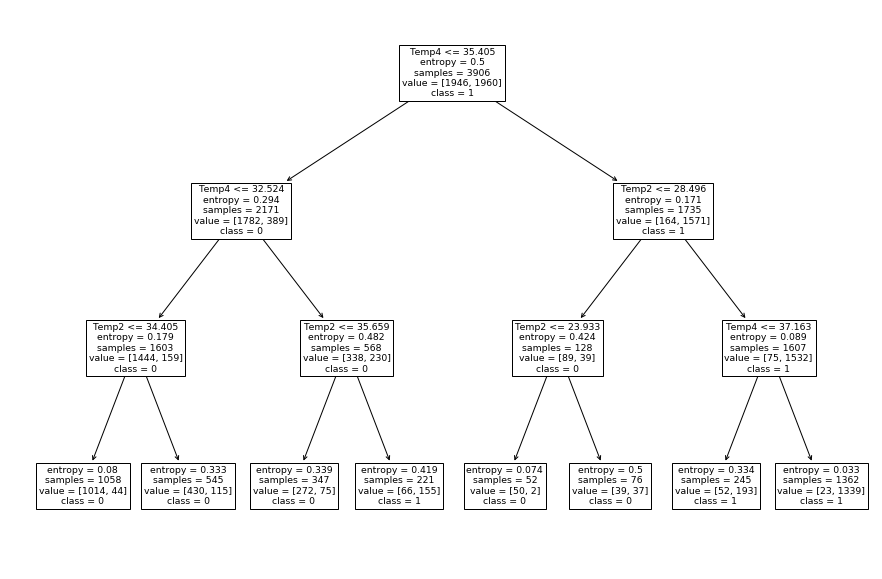

In [12]:
#Para dados da árvore (Não funciona para o GridSearchCV)
import matplotlib.pyplot
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)

from sklearn import tree
clf_tree=DecisionTreeClassifier(max_depth=3,min_samples_split=20,random_state=123)
model_tree=clf_tree.fit(X_train,Y_train)
tree.plot_tree(model_tree,feature_names=X_train.columns,class_names=['0','1'])
#fig.savefig('tree.png')

In [13]:
#Previsões
#model_tree.predict_proba(X_test)[:,1]#probabilidade de o target ser 1
pred=model_tree.predict(X_test)

In [14]:
#Métricas de avaliação
print('Accuracy:', accuracy_score(Y_test, pred))
print('F1 score:', f1_score(Y_test, pred))
print('Recall:',recall_score(Y_test, pred))
print('Precision:',precision_score(Y_test, pred))
print('\n clasification report:\n',classification_report(Y_test, pred))

#print(pd.crosstab(pd.Series(Y_test).reset_index(drop=True),pd.Series(pred)))

Accuracy: 0.8956254796623178
F1 score: 0.8977443609022557
Recall: 0.8831360946745562
Precision: 0.9128440366972477

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       627
           1       0.91      0.88      0.90       676

    accuracy                           0.90      1303
   macro avg       0.90      0.90      0.90      1303
weighted avg       0.90      0.90      0.90      1303



In [15]:
#Modelo: Regressão Logistica
clf_lg = LogisticRegression(solver='liblinear')
model_lg=clf_lg.fit(X_train,Y_train)
pred = model_lg.predict(X_test)

In [16]:
#Cross Validation
metrics = cross_val_score(estimator=model_lg, X=X_train, y=Y_train, cv=5, scoring='f1')
print(metrics)

[0.86842105 0.89884763 0.89258312 0.88639201 0.9003881 ]


In [17]:
#Coeficientes
important_features = pd.DataFrame({'coef':model_lg.coef_[0],'or':model_lg.coef_[0]**2},index=X_train.columns)
important_features.sort_values(by=['coef'],ascending=False,inplace=True)
important_features

,coef,or
Temp4,0.339507,0.115265
Temp2,0.132733,0.017618
Temp1,-0.008140,0.000066
Temp3,-0.016944,0.000287


In [18]:
#métricas de Avaliação
print('Accuracy:', accuracy_score(Y_test, pred))
print('F1 score:', f1_score(Y_test, pred))
print('Recall:',recall_score(Y_test, pred))
print('Precision:',precision_score(Y_test, pred))
print('\n clasification report:\n',classification_report(Y_test, pred))

#print(pd.crosstab(pd.Series(Y_test).reset_index(drop=True),pd.Series(pred)))

Accuracy: 0.8994627782041443
F1 score: 0.9026022304832713
Recall: 0.8979289940828402
Precision: 0.9073243647234679

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       627
           1       0.91      0.90      0.90       676

    accuracy                           0.90      1303
   macro avg       0.90      0.90      0.90      1303
weighted avg       0.90      0.90      0.90      1303



In [19]:
#Modelo: Naive Bayes
clf_naive = GaussianNB()
model_naive=clf_naive.fit(X_train, Y_train)
pred = model_naive.predict(X_test)

In [20]:
#Cross Validation
metrics = cross_val_score(estimator=model_naive, X=X_train, y=Y_train, cv=5, scoring='f1')
print(metrics)

[0.86675639 0.89206762 0.89908257 0.89171975 0.89790576]


In [21]:
#métricas de Avaliação
print('Accuracy:', accuracy_score(Y_test, pred))
print('F1 score:', f1_score(Y_test, pred))
print('Recall:',recall_score(Y_test, pred))
print('Precision:',precision_score(Y_test, pred))
print('\n clasification report:\n',classification_report(Y_test, pred))

#print(pd.crosstab(pd.Series(Y_test).reset_index(drop=True),pd.Series(pred)))

Accuracy: 0.9009976976208749
F1 score: 0.9027882441597588
Recall: 0.886094674556213
Precision: 0.9201228878648233

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       627
           1       0.92      0.89      0.90       676

    accuracy                           0.90      1303
   macro avg       0.90      0.90      0.90      1303
weighted avg       0.90      0.90      0.90      1303



In [22]:
#Modelo: RandomForest
parameters={'min_samples_split' : [20,50],'max_depth': [3,5,7],'n_estimators':[10,25,50]}
clf_rf=RandomForestClassifier(random_state=123)
clf_rf=GridSearchCV(clf_rf,parameters,cv=5,scoring = 'f1')
model_rf=clf_rf.fit(X_train,Y_train)

In [23]:
#Resultados do tunning
print(model_rf.best_params_)
print(model_rf.cv_results_['mean_test_score'])

{'max_depth': 7, 'min_samples_split': 20, 'n_estimators': 25}
[0.86978221 0.88055775 0.88575767 0.8684735  0.88038086 0.88631839
 0.88633228 0.88661217 0.88786917 0.88708349 0.88777545 0.88946659
 0.88870807 0.89028719 0.88989216 0.88479389 0.88606812 0.88951005]


In [24]:
#Feature importance
important_features = pd.Series(data=model_rf.best_estimator_.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

Temp4    0.707209
Temp2    0.253752
Temp1    0.020641
Temp3    0.018398
dtype: float64

In [25]:
#Previsões
#model_tree.predict_proba(X_test)[:,1]#probabilidade de o target ser 1
pred=model_rf.predict(X_test)

In [26]:
#métricas de Avaliação
print('Accuracy:', accuracy_score(Y_test, pred))
print('F1 score:', f1_score(Y_test, pred))
print('Recall:',recall_score(Y_test, pred))
print('Precision:',precision_score(Y_test, pred))
print('\n clasification report:\n',classification_report(Y_test, pred))

#print(pd.crosstab(pd.Series(Y_test).reset_index(drop=True),pd.Series(pred)))

Accuracy: 0.9040675364543361
F1 score: 0.9053747161241483
Recall: 0.8846153846153846
Precision: 0.9271317829457364

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       627
           1       0.93      0.88      0.91       676

    accuracy                           0.90      1303
   macro avg       0.90      0.90      0.90      1303
weighted avg       0.91      0.90      0.90      1303



In [27]:
#Alternativamente, sem o tuning de hiperparâmetros
clf_rf=RandomForestClassifier(max_depth=7,min_samples_split=20,n_estimators=25,random_state=123)
model_rf=clf_rf.fit(X_train,Y_train)
pred = model_rf.predict(X_test)

#Cross Validation
metrics = cross_val_score(estimator=model_rf, X=X_train, y=Y_train, cv=5, scoring='f1')
print(metrics)

#Previsões
pred=model_rf.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, pred))
print('F1 score:', f1_score(Y_test, pred))
print('Recall:',recall_score(Y_test, pred))
print('Precision:',precision_score(Y_test, pred))
print('\n clasification report:\n',classification_report(Y_test, pred))

[0.86838535 0.89790576 0.89709763 0.88860435 0.8994709 ]
Accuracy: 0.9040675364543361
F1 score: 0.9053747161241483
Recall: 0.8846153846153846
Precision: 0.9271317829457364

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       627
           1       0.93      0.88      0.91       676

    accuracy                           0.90      1303
   macro avg       0.90      0.90      0.90      1303
weighted avg       0.91      0.90      0.90      1303



In [28]:
#Modelo: SVM
#parameters={'C' : [0.1,1,10],'gamma':[0.1,1,10],'kernel':['linear','poly']}
#clf_svm=svm.SVC(random_state=123)
#clf_svm=GridSearchCV(clf_svm,parameters,cv=5,scoring = 'f1')
#model_svm=clf_svm.fit(X_train,Y_train)

In [29]:
#Resultados do tunning
#print(model_svm.best_params_)
#print(model_svm.cv_results_['mean_test_score'])

In [30]:
#Previsões
#model_tree.predict_proba(X_test)[:,1]#probabilidade de o target ser 1
#pred=model_svm.predict(X_test)

In [31]:
#métricas de Avaliação
#print('Accuracy:', accuracy_score(Y_test, pred))
#print('F1 score:', f1_score(Y_test, pred))
#print('Recall:',recall_score(Y_test, pred))
#print('Precision:',precision_score(Y_test, pred))
#print('\n clasification report:\n',classification_report(Y_test, pred))

#print(pd.crosstab(pd.Series(Y_test).reset_index(drop=True),pd.Series(pred)))

In [32]:
#Modelo: KNN
parameters={'n_neighbors' : [2,3,5,10,20,50]}
clf_knn = KNeighborsClassifier()
clf_knn=GridSearchCV(clf_knn,parameters,cv=5,scoring = 'f1')
model_knn=clf_knn.fit(X_train,Y_train)

In [33]:
#Resultados do tunning
print(model_knn.best_params_)
print(model_knn.cv_results_['mean_test_score'])

{'n_neighbors': 50}
[0.84507248 0.86669368 0.87470799 0.8804524  0.88562615 0.88770688]


In [34]:
#Previsões
#model_tree.predict_proba(X_test)[:,1]#probabilidade de o target ser 1
pred=model_knn.predict(X_test)

In [35]:
#métricas de Avaliação
print('Accuracy:', accuracy_score(Y_test, pred))
print('F1 score:', f1_score(Y_test, pred))
print('Recall:',recall_score(Y_test, pred))
print('Precision:',precision_score(Y_test, pred))
print('\n clasification report:\n',classification_report(Y_test, pred))

#print(pd.crosstab(pd.Series(Y_test).reset_index(drop=True),pd.Series(pred)))

Accuracy: 0.8948580199539524
F1 score: 0.8967596081386587
Recall: 0.8801775147928994
Precision: 0.9139784946236559

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       627
           1       0.91      0.88      0.90       676

    accuracy                           0.89      1303
   macro avg       0.89      0.90      0.89      1303
weighted avg       0.90      0.89      0.89      1303



In [36]:
#Modelo: Gradiente Boosting
parameters={'min_samples_split' : [20,50],'max_depth': [3,5,7],'n_estimators':[10,25,50]}
clf_gb=GradientBoostingClassifier(random_state=123)
clf_gb=GridSearchCV(clf_gb,parameters,cv=5,scoring = 'f1')
model_gb=clf_gb.fit(X_train,Y_train)

In [37]:
#Resultados do tunning
print(model_gb.best_params_)
print(model_gb.cv_results_['mean_test_score'])

{'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
[0.88894913 0.89058002 0.89199593 0.88871454 0.89067931 0.89148941
 0.88766263 0.88807265 0.88687446 0.88726089 0.88840025 0.8870994
 0.87984716 0.88370514 0.88398094 0.87934972 0.88509561 0.88550443]


In [38]:
#Feature importance
important_features = pd.Series(data=model_gb.best_estimator_.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

Temp4    0.821342
Temp2    0.173071
Temp1    0.003123
Temp3    0.002463
dtype: float64

In [39]:
#Previsões
#model_tree.predict_proba(X_test)[:,1]#probabilidade de o target ser 1
pred=model_gb.predict(X_test)

In [40]:
#métricas de Avaliação
print('Accuracy:', accuracy_score(Y_test, pred))
print('F1 score:', f1_score(Y_test, pred))
print('Recall:',recall_score(Y_test, pred))
print('Precision:',precision_score(Y_test, pred))
print('\n clasification report:\n',classification_report(Y_test, pred))

#print(pd.crosstab(pd.Series(Y_test).reset_index(drop=True),pd.Series(pred)))

Accuracy: 0.9040675364543361
F1 score: 0.9065071054599849
Recall: 0.8964497041420119
Precision: 0.9167927382753404

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       627
           1       0.92      0.90      0.91       676

    accuracy                           0.90      1303
   macro avg       0.90      0.90      0.90      1303
weighted avg       0.90      0.90      0.90      1303



In [41]:
#Modelo: Análise de Discriminante Linear
clf_lda = LinearDiscriminantAnalysis()
model_lda=clf_lda.fit(X_train, Y_train)
pred = model_lda.predict(X_test)

In [42]:
#Cross Validation
metrics = cross_val_score(estimator=model_lda, X=X_train, y=Y_train, cv=5, scoring='f1')
print(metrics)

[0.86062246 0.88627451 0.8976378  0.89144317 0.89153439]


In [43]:
#métricas de Avaliação
print('Accuracy:', accuracy_score(Y_test, pred))
print('F1 score:', f1_score(Y_test, pred))
print('Recall:',recall_score(Y_test, pred))
print('Precision:',precision_score(Y_test, pred))
print('\n clasification report:\n',classification_report(Y_test, pred))

#print(pd.crosstab(pd.Series(Y_test).reset_index(drop=True),pd.Series(pred)))

Accuracy: 0.8925556408288565
F1 score: 0.8937784522003034
Recall: 0.871301775147929
Precision: 0.9174454828660437

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       627
           1       0.92      0.87      0.89       676

    accuracy                           0.89      1303
   macro avg       0.89      0.89      0.89      1303
weighted avg       0.89      0.89      0.89      1303



In [44]:
#Modelo: Análise de Discriminante Quadrática
clf_qda = LinearDiscriminantAnalysis()
model_qda=clf_qda.fit(X_train, Y_train)
pred = model_qda.predict(X_test)

In [45]:
#Cross Validation
metrics = cross_val_score(estimator=model_qda, X=X_train, y=Y_train, cv=5, scoring='f1')
print(metrics)

[0.86062246 0.88627451 0.8976378  0.89144317 0.89153439]


In [46]:
#métricas de Avaliação
print('Accuracy:', accuracy_score(Y_test, pred))
print('F1 score:', f1_score(Y_test, pred))
print('Recall:',recall_score(Y_test, pred))
print('Precision:',precision_score(Y_test, pred))
print('\n clasification report:\n',classification_report(Y_test, pred))

#print(pd.crosstab(pd.Series(Y_test).reset_index(drop=True),pd.Series(pred)))

Accuracy: 0.8925556408288565
F1 score: 0.8937784522003034
Recall: 0.871301775147929
Precision: 0.9174454828660437

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       627
           1       0.92      0.87      0.89       676

    accuracy                           0.89      1303
   macro avg       0.89      0.89      0.89      1303
weighted avg       0.89      0.89      0.89      1303



In [47]:
#Modelo: XGBoosting
parameters={'max_depth': [3,5,7],'n_estimators':[10,25,50]}
clf_xgb = XGBClassifier(random_state=123)
clf_xgb=GridSearchCV(clf_xgb,parameters,cv=5,scoring = 'f1')
model_xgb=clf_xgb.fit(X_train,Y_train)

In [48]:
#Resultados do tunning
print(model_xgb.best_params_)
print(model_xgb.cv_results_['mean_test_score'])

{'max_depth': 3, 'n_estimators': 50}
[0.88833282 0.89095477 0.89183804 0.88852223 0.88836247 0.88955419
 0.88030672 0.88213257 0.88027856]


In [49]:
#Feature importance
important_features = pd.Series(data=model_xgb.best_estimator_.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

Temp4    0.762003
Temp2    0.200066
Temp1    0.024180
Temp3    0.013751
dtype: float32

In [50]:
#Previsões
#model_tree.predict_proba(X_test)[:,1]#probabilidade de o target ser 1
pred=model_xgb.predict(X_test)

In [51]:
#métricas de Avaliação
print('Accuracy:', accuracy_score(Y_test, pred))
print('F1 score:', f1_score(Y_test, pred))
print('Recall:',recall_score(Y_test, pred))
print('Precision:',precision_score(Y_test, pred))
print('\n clasification report:\n',classification_report(Y_test, pred))

#print(pd.crosstab(pd.Series(Y_test).reset_index(drop=True),pd.Series(pred)))

Accuracy: 0.9009976976208749
F1 score: 0.9029345372460497
Recall: 0.8875739644970414
Precision: 0.9188361408882083

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       627
           1       0.92      0.89      0.90       676

    accuracy                           0.90      1303
   macro avg       0.90      0.90      0.90      1303
weighted avg       0.90      0.90      0.90      1303



In [52]:
#Modelo: Lightgbm'
train_data = lgbm.Dataset(X_train, label=Y_train)
test_data = lgbm.Dataset(X_test, label=Y_test)

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat)
    return 'f1', f1_score(y_true, y_hat), True

parameters = {
    'application': 'binary',
    'objective': 'binary',
    #'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model_lgbm = lgbm.train(parameters,
                       train_data,
                       feval=lgb_f1_score,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's binary_logloss: 0.675852	valid_0's f1: 0.779343
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.64704	valid_0's f1: 0.886583
[3]	valid_0's binary_logloss: 0.632378	valid_0's f1: 0.849334
[4]	valid_0's binary_logloss: 0.607363	valid_0's f1: 0.887574
[5]	valid_0's binary_logloss: 0.595117	valid_0's f1: 0.874372
[6]	valid_0's binary_logloss: 0.572927	valid_0's f1: 0.887899
[7]	valid_0's binary_logloss: 0.562439	valid_0's f1: 0.879825
[8]	valid_0's binary_logloss: 0.542851	valid_0's f1: 0.89153
[9]	valid_0's binary_logloss: 0.533641	valid_0's f1: 0.886263
[10]	valid_0's binary_logloss: 0.515946	valid_0's f1: 0.890706
[11]	valid_0's binary_logloss: 0.508036	valid_0's f1: 0.887899
[12]	valid_0's binary_logloss: 0.492313	valid_0's f1: 0.89171
[13]	valid_0's binary_logloss: 0.485459	valid_0's f1: 0.889881
[14]	valid_0's binary_logloss: 0.471297	valid_0's f1: 0.892033
[15]	valid_0's binary_logloss: 0.465219	valid_0's f1: 0.890706
[16]

In [53]:
#Feature importance
important_features = pd.Series(data=model_lgbm.feature_importance(),index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

Temp3    225
Temp2    220
Temp1    200
Temp4    195
dtype: int32

In [54]:
#Previsões
pred = model_lgbm.predict(X_test, num_iteration=model_lgbm.best_iteration)
pred=[1 if x>=0.5 else 0 for x in pred]

In [55]:
#métricas de Avaliação
print('Accuracy:', accuracy_score(Y_test, pred))
print('F1 score:', f1_score(Y_test, pred))
print('Recall:',recall_score(Y_test, pred))
print('Precision:',precision_score(Y_test, pred))
print('\n clasification report:\n',classification_report(Y_test, pred))

#print(pd.crosstab(pd.Series(Y_test).reset_index(drop=True),pd.Series(pred)))

Accuracy: 0.8933231005372217
F1 score: 0.8955672426746807
Recall: 0.8816568047337278
Precision: 0.9099236641221374

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       627
           1       0.91      0.88      0.90       676

    accuracy                           0.89      1303
   macro avg       0.89      0.89      0.89      1303
weighted avg       0.89      0.89      0.89      1303



In [56]:
parameters={'max_depth': [3,5,7],'n_estimators':[10,25,50]}
clf_lgbm = lgbm.LGBMClassifier(boosting_type='gbdt',  objective='binary', 
                               learning_rate=0.01, metric='f1',n_jobs=1)

clf_lgbm = GridSearchCV(estimator=clf_lgbm, param_grid=parameters, cv=5)
model_lgbm = clf_lgbm.fit(X=X_train, y=Y_train)

In [57]:
#Resultados do tunning
print(model_lgbm.best_params_)
print(model_lgbm.cv_results_['mean_test_score'])

{'max_depth': 3, 'n_estimators': 50}
[0.89170507 0.890681   0.8937532  0.89272913 0.89119304 0.89247312
 0.88837686 0.89016897 0.89272913]


In [58]:
#Feature importance
important_features = pd.Series(data=model_lgbm.best_estimator_.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

Temp4    193
Temp2    157
Temp3      0
Temp1      0
dtype: int32

In [59]:
#Previsões
pred = model_lgbm.predict(X_test)

In [60]:
#métricas de Avaliação
print('Accuracy:', accuracy_score(Y_test, pred))
print('F1 score:', f1_score(Y_test, pred))
print('Recall:',recall_score(Y_test, pred))
print('Precision:',precision_score(Y_test, pred))
print('\n clasification report:\n',classification_report(Y_test, pred))

#print(pd.crosstab(pd.Series(Y_test).reset_index(drop=True),pd.Series(pred)))

Accuracy: 0.9009976976208749
F1 score: 0.9035153328347046
Recall: 0.893491124260355
Precision: 0.913767019667171

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       627
           1       0.91      0.89      0.90       676

    accuracy                           0.90      1303
   macro avg       0.90      0.90      0.90      1303
weighted avg       0.90      0.90      0.90      1303



In [61]:
models = []
models.append(('Árvore de decisão', model_tree))
models.append(('Regressão Logística', model_lg))
models.append(('Naive Bayes', model_naive))
models.append(('Random Forest', model_rf))
models.append(('Gradiente Boosting', model_gb))
models.append(('XG Boosting', model_xgb))
models.append(('Light GBM', model_lgbm))
#models.append(('SVM', model_svm))
models.append(('KNN', model_knn))
models.append(('LDA', model_lda))
models.append(('QDA', model_qda))

In [62]:
#Comparação de modelos
def comparison_models(models,metrics,Y_test,X_test):
    '''
    Função que avalia o desempenho de modelos na base de teste.
    | Parâmetros:
    | -- models: Modelos para serem comparados.
    | -- metrics: Métrica de avaliação.
    | -- Y_test: Y da base teste/validação.
    | -- X_test: Base de teste/validação.
    '''
    results = []
    names = []
    for name, model in models:
        pred=model.predict(X_test)
        out = eval(metrics+'_score(Y_test, pred)')
        results.append(out)
        names.append(name)
        msg = "%s: %f" % (name, out)
        print(msg)
comparison_models(models,'f1',Y_test,X_test)

Árvore de decisão: 0.897744
Regressão Logística: 0.902602
Naive Bayes: 0.902788
Random Forest: 0.905375
Gradiente Boosting: 0.906507
XG Boosting: 0.902935
Light GBM: 0.903515
KNN: 0.896760
LDA: 0.893778
QDA: 0.893778


In [63]:
#Salvando modelo
import pickle
filename = 'finalized_model.sav'
pickle.dump(model_rf, open(filename, 'wb'))

In [65]:
#Carregando o modelo salvo e predizendo dados
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
print(f1_score(Y_test, result))

0.9053747161241483
